In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns


# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Misc
import warnings
warnings.filterwarnings("ignore")

In [2]:
SP_variable = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/Sustainability_variable.csv")
IV_data = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -2/Processed data part2/IV_data.csv")

In [3]:
SP_variable.head()

,msw_year,Urban_GG_Emissions,Avg Social index of country,Avg infra index of country,Avg Urban Gov index of country,country,mean,Sustanability variable
0,0.101843,0.314039,0.754425,0.457479,1.000000,Australia,0.525557,0.525557
1,0.301710,0.015309,0.838506,0.924897,0.749347,Austria,0.565954,0.565954
2,0.289483,0.066966,0.322983,0.701295,0.946927,Belgium,0.465531,0.465531
3,0.633525,0.414086,0.883587,0.209805,0.558367,Canada,0.539874,0.539874
4,0.068032,0.007020,0.880180,0.615564,0.924515,Denmark,0.499062,0.499062


In [4]:
SP_variable

,msw_year,Urban_GG_Emissions,Avg Social index of country,Avg infra index of country,Avg Urban Gov index of country,country,mean,Sustanability variable
0,0.101843,0.314039,0.754425,0.457479,1.000000,Australia,0.525557,0.525557
1,0.301710,0.015309,0.838506,0.924897,0.749347,Austria,0.565954,0.565954
2,0.289483,0.066966,0.322983,0.701295,0.946927,Belgium,0.465531,0.465531
3,0.633525,0.414086,0.883587,0.209805,0.558367,Canada,0.539874,0.539874
4,0.068032,0.007020,0.880180,0.615564,0.924515,Denmark,0.499062,0.499062
5,0.000000,0.012949,1.000000,0.872418,0.664925,Finland,0.510058,0.510058
6,0.357588,0.242750,0.660870,0.642872,0.822907,France,0.545397,0.545397
7,0.392955,0.556956,0.930004,0.798822,0.701636,Germany,0.676075,0.676075
8,0.128342,0.032491,0.290985,0.625303,0.577066,Greece,0.330837,0.330837
9,0.290979,0.010254,0.842922,0.486972,0.568404,Hungary,0.439906,0.439906


In [5]:
IV_data.head()

,country,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,change of urbanization % since 1960,2014 usable water per capita,2019 FDI data
0,Afghanistan,39,7474525.0,502.115487,8.401,25.754,17.353,1412.912141,2.340455e+07
1,Albania,50,1691769.0,5352.857411,30.705,61.229,30.524,9310.845162,1.201022e+09
2,Algeria,56,10827998.0,3948.343279,30.510,73.189,42.679,289.027090,1.381890e+09
3,American Samoa,1,12576.0,NaN,66.211,87.147,20.936,NaN,NaN
4,Andorra,1,22151.0,40886.391160,58.450,87.984,29.534,3984.194514,NaN


In [6]:
IV_data.shape

(177, 9)

In [7]:
merged_data = pd.merge(SP_variable,IV_data,on = "country", how = "inner")

merged_data.head()

,msw_year,Urban_GG_Emissions,Avg Social index of country,Avg infra index of country,Avg Urban Gov index of country,country,mean,Sustanability variable,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,change of urbanization % since 1960,2014 usable water per capita,2019 FDI data
0,0.101843,0.314039,0.754425,0.457479,1.000000,Australia,0.525557,0.525557,301,23508533.0,54907.10191,81.529,86.124,4.595,20957.854010,4.007478e+10
1,0.301710,0.015309,0.838506,0.924897,0.749347,Austria,0.565954,0.565954,134,4446483.0,50277.27509,64.720,58.515,-6.205,6435.491337,-8.100276e+09
2,0.289483,0.066966,0.322983,0.701295,0.946927,Belgium,0.465531,0.465531,77,3639342.0,46116.69923,92.460,98.041,5.581,1070.562849,-2.896567e+10
3,0.633525,0.414086,0.883587,0.209805,0.558367,Canada,0.539874,0.539874,625,37747786.0,46194.72523,69.061,81.482,12.421,80423.427940,4.784528e+10
4,0.068032,0.007020,0.880180,0.615564,0.924515,Denmark,0.499062,0.499062,12,1894253.0,59822.09296,73.687,87.994,14.307,1063.174728,-7.837367e+09


In [8]:
IML_Data = merged_data[['country','Sustanability variable','population','2019 GDP per capita','change of urbanization % since 1960','2014 usable water per capita','2019 FDI data']]

In [9]:
IML_Data.head()

,country,Sustanability variable,population,2019 GDP per capita,change of urbanization % since 1960,2014 usable water per capita,2019 FDI data
0,Australia,0.525557,23508533.0,54907.10191,4.595,20957.854010,4.007478e+10
1,Austria,0.565954,4446483.0,50277.27509,-6.205,6435.491337,-8.100276e+09
2,Belgium,0.465531,3639342.0,46116.69923,5.581,1070.562849,-2.896567e+10
3,Canada,0.539874,37747786.0,46194.72523,12.421,80423.427940,4.784528e+10
4,Denmark,0.499062,1894253.0,59822.09296,14.307,1063.174728,-7.837367e+09


In [10]:
IML_Data.shape

(20, 7)

In [11]:
 #checking how much invalid data exists
    # to determine if data is valid
IML_Data.isnull().sum()

country                                0
Sustanability variable                 0
population                             0
2019 GDP per capita                    0
change of urbanization % since 1960    0
2014 usable water per capita           0
2019 FDI data                          0
dtype: int64

In [12]:
## Let us convert the Sustainability variable into a Dummy variable by re-defining that an urban area of country is considered Sustainable if the variable's value is above 0.5 and not if it is below 0.5.  

In [13]:
IML_Data['SV_Dummy'] = 1*(IML_Data['Sustanability variable']>=0.5)
IML_Data['SV_Dummy']  = pd.to_numeric(IML_Data['SV_Dummy'] ,errors='coerce')
IML_Data.head()

,country,Sustanability variable,population,2019 GDP per capita,change of urbanization % since 1960,2014 usable water per capita,2019 FDI data,SV_Dummy
0,Australia,0.525557,23508533.0,54907.10191,4.595,20957.854010,4.007478e+10,1
1,Austria,0.565954,4446483.0,50277.27509,-6.205,6435.491337,-8.100276e+09,1
2,Belgium,0.465531,3639342.0,46116.69923,5.581,1070.562849,-2.896567e+10,0
3,Canada,0.539874,37747786.0,46194.72523,12.421,80423.427940,4.784528e+10,1
4,Denmark,0.499062,1894253.0,59822.09296,14.307,1063.174728,-7.837367e+09,0


In [14]:
IML_Data.dtypes

country                                 object
Sustanability variable                 float64
population                             float64
2019 GDP per capita                    float64
change of urbanization % since 1960    float64
2014 usable water per capita           float64
2019 FDI data                          float64
SV_Dummy                                 int32
dtype: object

## Thank God, even after mixing so many datasets, I got  data output!No null values too!But not really sure if I should break this data into training & test data. 

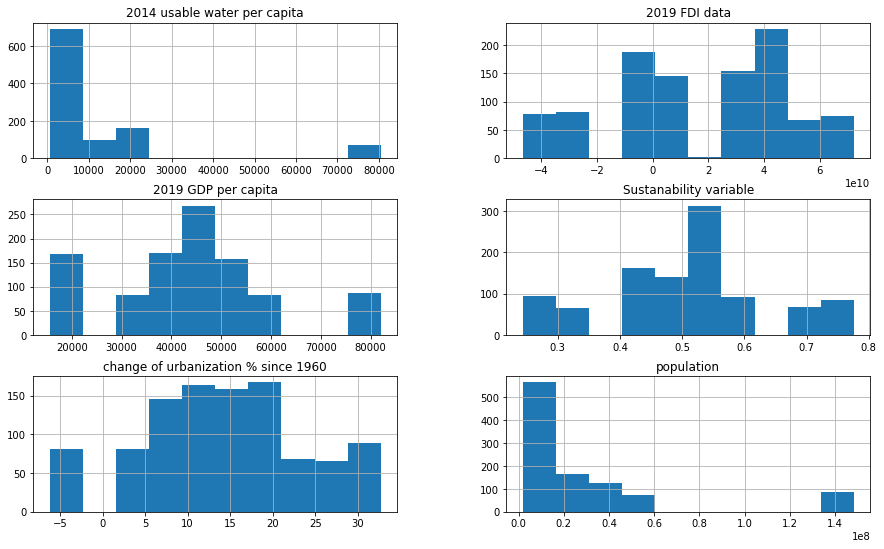

In [51]:
num_bins = 10

IML_Data.hist(bins = num_bins, figsize=(15,9))
plt.savefig("HistogramPlots")
plt.show()

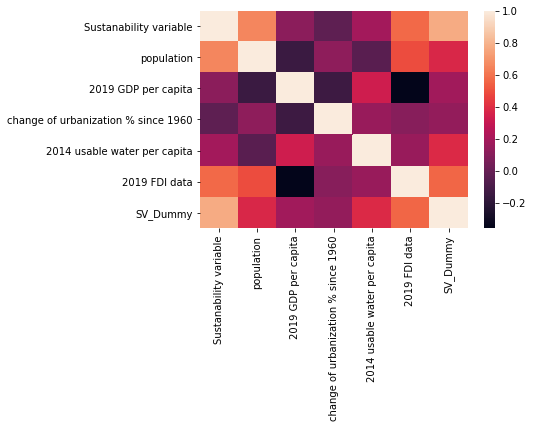

In [16]:
# Correlation between all the Parameters  
# if it is positive, the two variables tend to be high or low together
# If it is negative, the two variables tend to be opposite of each other
corr = IML_Data.corr()
# Correlation Plot
sns.heatmap(corr)

In [17]:
# Correlation Values of all the Features with respect to Target Variable 
## Top Values
print (corr['Sustanability variable'].sort_values(ascending=False)[:10], '\n')


Sustanability variable                 1.000000
SV_Dummy                               0.773845
population                             0.655535
2019 FDI data                          0.574429
2014 usable water per capita           0.191147
2019 GDP per capita                    0.115604
change of urbanization % since 1960   -0.025398
Name: Sustanability variable, dtype: float64 



In [18]:
## Let us split our small data set into training and test data 

### Generating Synthetic data to the existing data for ML Modelling 

In [19]:
columns = IML_Data.columns.to_numpy()
iteration_count = 50
IML_Data_rev = pd.DataFrame(columns=columns)

for i in range(iteration_count):
    for k in IML_Data.iterrows():
        data_obj = {}
        for j in range(columns.size):
            random_index = np.random.randint(0,13, dtype='int')
            data_obj[columns[j]] = IML_Data.loc[random_index][columns[j]]
        IML_Data_rev = IML_Data_rev.append(data_obj, ignore_index=True)

IML_Data = IML_Data.append(IML_Data_rev, ignore_index=True)

In [20]:
IML_Data.shape

(1020, 8)

In [21]:
y = IML_Data[['SV_Dummy']]
X = IML_Data.drop(columns=['SV_Dummy','Sustanability variable','country'])


In [22]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [23]:
print(train_X.shape[0]/IML_Data.shape[0])
print(test_X.shape[0]/IML_Data.shape[0])

0.75
0.25


In [24]:
# Let's scale the data
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [25]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,population,2019 GDP per capita,change of urbanization % since 1960,2014 usable water per capita,2019 FDI data
0,0.018404,0.498364,0.000000,0.073011,0.000000
1,0.017439,0.461812,0.762371,0.029995,0.821847
2,0.102168,0.666082,0.277628,0.237843,0.705208
3,1.000000,0.592060,0.527287,0.124187,0.466892
4,0.018404,0.666082,0.451916,0.254960,0.729592
...,...,...,...,...,...
760,0.244938,0.264981,0.627902,0.005794,0.431193
761,1.000000,0.592060,0.627902,0.005701,0.662069
762,0.030831,0.371268,0.934706,0.237843,0.000000
763,0.017439,0.013261,0.643531,0.254960,0.431193


In [26]:
train_X.dtypes

population                             float64
2019 GDP per capita                    float64
change of urbanization % since 1960    float64
2014 usable water per capita           float64
2019 FDI data                          float64
dtype: object

In [27]:
train_y.dtypes

SV_Dummy    object
dtype: object

In [28]:
train_y['SV_Dummy']  = pd.to_numeric(train_y['SV_Dummy'] ,errors='coerce')

In [29]:
train_y.dtypes

SV_Dummy    int64
dtype: object

### Train Models
### Cross Validation

In [30]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)

## Pipeline

In [31]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

### Run the Models

In [32]:
search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4],
    'model__n_estimators':[500,1000,1500]}
    
]

In [33]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [34]:
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier(n_neighbors=50)],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [2, 3, 4],
                          'model__n_estimators': [500, 1000, 1500]}],
             scoring='roc_auc')

In [35]:
search.best_score_

0.5012542512603858

In [36]:
search.best_params_

{'model': KNeighborsClassifier(n_neighbors=50), 'model__n_neighbors': 50}

In [37]:
rf_mod = search.best_estimator_

### Performance

In [38]:
m.roc_auc_score(train_y,rf_mod.predict_proba(train_X)[:,1])

0.5731472966109837

In [39]:
m.accuracy_score(train_y,rf_mod.predict(train_X))

0.5581699346405229

### Model Interpretation

In [40]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

In [41]:
from sklearn.inspection import permutation_importance

In [42]:
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=5)

In [43]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,2019 FDI data,0.023268,0.014913,-0.006559,0.053095
1,change of urbanization % since 1960,0.020915,0.015903,-0.010890,0.052720
2,2014 usable water per capita,0.012288,0.005881,0.000526,0.024049
3,population,0.011503,0.008765,-0.006027,0.029033
4,2019 GDP per capita,0.010719,0.016931,-0.023143,0.044581


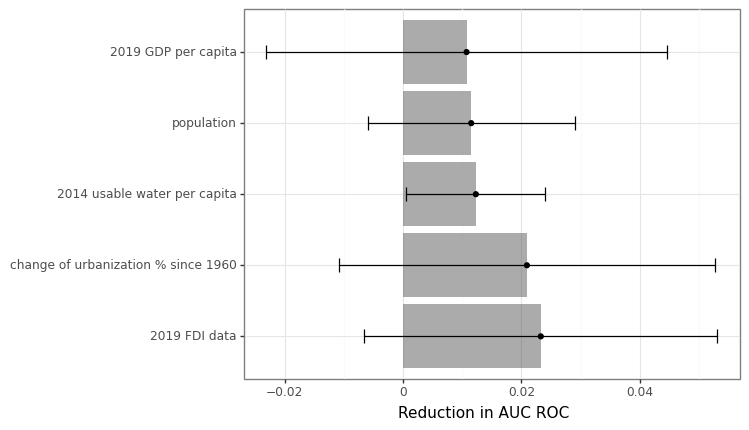

<ggplot: (148905359213)>

In [44]:
# Plot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

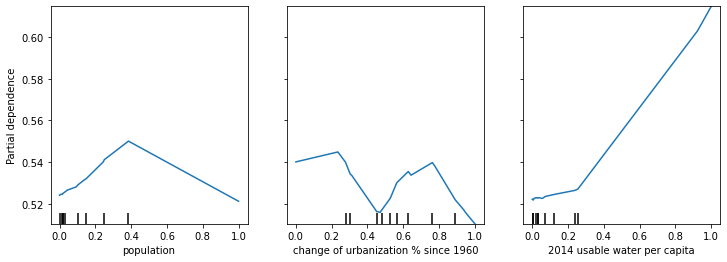

In [45]:
features_1 = ['population','change of urbanization % since 1960','2014 usable water per capita' ]

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, train_X, features_1,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

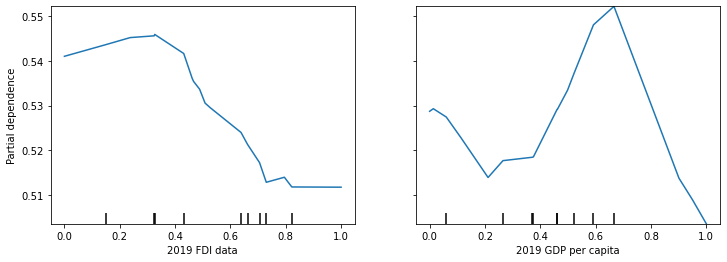

In [46]:
features_2 = ['2019 FDI data','2019 GDP per capita'  ]

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, train_X, features_2,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

### Markdown

In [47]:
from pdpbox import pdp



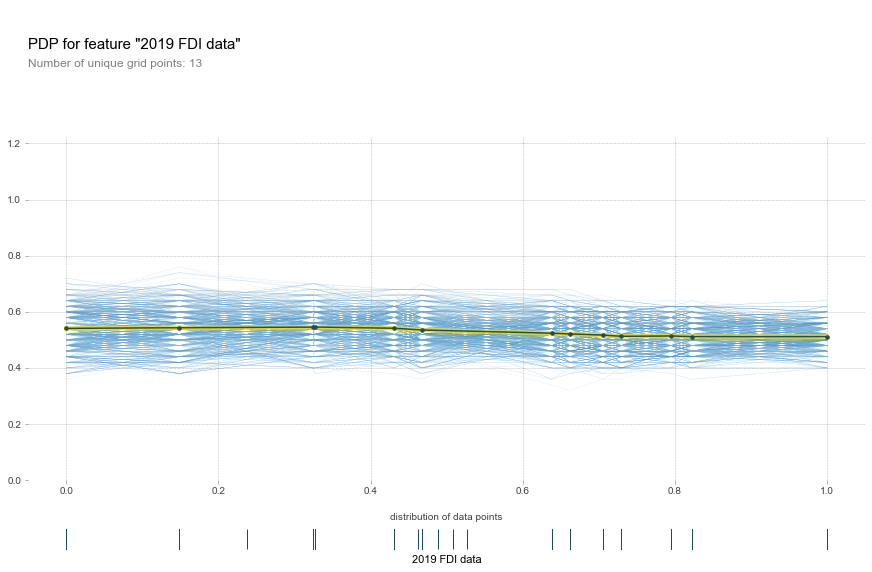

In [52]:

pdp_dist = pdp.pdp_isolate(model = rf_mod, 
                           dataset = train_X,
                           model_features = train_X.columns.tolist(),
                           feature="2019 FDI data",num_grid_points=20)

fig,ax = pdp.pdp_plot(pdp_dist,'2019 FDI data',plot_pts_dist=True,
                      center=False,plot_lines=True, # ICE part                          
                      figsize=(15,10))

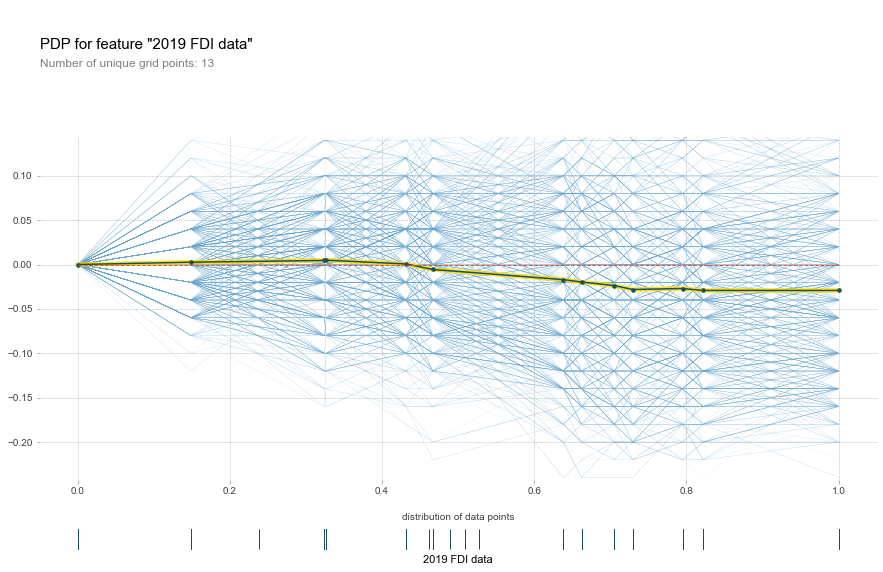

In [53]:
pdp_dist = pdp.pdp_isolate(model = rf_mod, 
                           dataset = train_X,
                           model_features = train_X.columns.tolist(),
                           feature='2019 FDI data',num_grid_points=20)

fig,ax = pdp.pdp_plot(pdp_dist,'2019 FDI data',plot_pts_dist=True,
                      center=True,plot_lines=True, # ICE part                          
                      figsize=(15,10))